In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
from collections import Counter

In [66]:
raw = pd.read_csv('./data/airbnb.csv')

In [67]:
raw.loc[0]

id                                                                            7087327
listing_url                                      https://www.airbnb.com/rooms/7087327
scrape_id                                                              20151002231825
last_scraped                                                               2015-10-03
name                                               Historic DC Condo-Walk to Capitol!
summary                             Professional pictures coming soon! Welcome to ...
space                                                                             NaN
description                         Professional pictures coming soon! Welcome to ...
experiences_offered                                                              none
neighborhood_overview                                                             NaN
notes                                                                             NaN
transit                                               

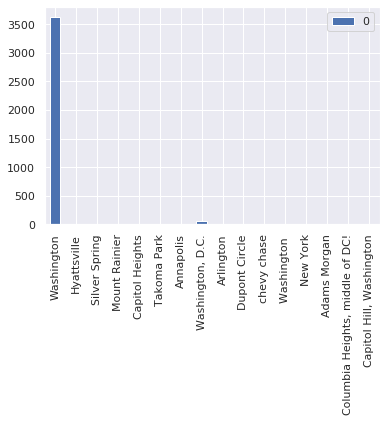

In [68]:
city_counts = Counter(raw['city'])
city = pd.DataFrame.from_dict(city_counts, orient='index')
city.plot(kind='bar')

most data are in Washington, so we drop rest of the places

In [69]:
raw = raw[raw.city == 'Washington']
data = raw[['property_type', 'room_type','security_deposit', 'review_scores_rating', 'reviews_per_month', 'cleaning_fee', 'bathrooms', 'bedrooms', 'beds', 'price']]

In [70]:
for x in ['security_deposit', 'cleaning_fee', 'price']:
    data[x] = data[x].str.replace(',', '').str.replace('$', '')
    
data['property_type'].dropna(inplace=True)
data['review_scores_rating'].fillna(data['review_scores_rating'].mean(), inplace=True)
data.fillna(0, inplace=True)
data = data[~(data[['property_type']] == 0).any(axis=1)]

data[['security_deposit', 'review_scores_rating', 'reviews_per_month', 'cleaning_fee', 'price' ]] = data[['security_deposit', 
             'review_scores_rating', 
             'reviews_per_month', 
             'cleaning_fee', 
             'price' ]].astype('float')



/home/jianyan/.conda/envs/trade-bot/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/jianyan/.conda/envs/trade-bot/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [71]:
data = pd.get_dummies(data)
data.head()

,security_deposit,review_scores_rating,reviews_per_month,cleaning_fee,bathrooms,bedrooms,beds,price,property_type_Apartment,property_type_Bed & Breakfast,...,property_type_Cabin,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,100.0,93.427955,0.00,115.0,1.0,1.0,2.0,160.0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,0.0,94.000000,2.11,100.0,3.0,3.0,3.0,350.0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,0.0,93.427955,0.00,0.0,1.0,1.0,1.0,95.0,0,0,...,0,0,0,1,0,0,0,0,1,0
5,0.0,93.427955,0.00,0.0,1.0,2.0,4.0,99.0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,150.0,93.427955,0.00,50.0,2.0,2.0,2.0,100.0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [73]:
a = list(data.columns)
a.remove('price')
a.append('price')
data = data[a]

In [74]:
data.head()

,security_deposit,review_scores_rating,reviews_per_month,cleaning_fee,bathrooms,bedrooms,beds,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,...,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,price
0,100.0,93.427955,0.00,115.0,1.0,1.0,2.0,0,0,0,...,0,0,1,0,0,0,1,0,0,160.0
1,0.0,94.000000,2.11,100.0,3.0,3.0,3.0,0,0,0,...,0,0,1,0,0,0,1,0,0,350.0
3,0.0,93.427955,0.00,0.0,1.0,1.0,1.0,0,0,0,...,0,0,1,0,0,0,0,1,0,95.0
5,0.0,93.427955,0.00,0.0,1.0,2.0,4.0,0,0,1,...,0,0,0,0,0,0,1,0,0,99.0
6,150.0,93.427955,0.00,50.0,2.0,2.0,2.0,0,0,0,...,1,0,0,0,0,0,1,0,0,100.0


In [63]:
data.columns

Index(['security_deposit', 'review_scores_rating', 'reviews_per_month',
       'cleaning_fee', 'bathrooms', 'bedrooms', 'beds',
       'property_type_Apartment', 'property_type_Bed & Breakfast',
       'property_type_Boat', 'property_type_Bungalow', 'property_type_Cabin',
       'property_type_Condominium', 'property_type_Dorm',
       'property_type_House', 'property_type_Loft', 'property_type_Other',
       'property_type_Townhouse', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room', 'price'],
      dtype='object')

In [76]:
new_listing = [0, 94, 0, 0, 1, 1, 2, 1, 0 , 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]

In [99]:
def predict_price(new_listing, k, data):
        tmp = data.copy()
        tmp['py_mean'] = ((data.iloc[:, :21] - new_listing) ** 2).sum(axis=1)
        tmp.sort_values(by='py_mean', inplace=True)
        return tmp['price'][:k + 1].mean()

In [101]:
predict_price(new_listing, 10, data)

182.54545454545453